Below are the results from our wine tasting. It had 55 participants and 30 wines selected randomly from the shelves at Trader Joes's.

In [1]:
%matplotlib inline
import pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import datetime as dt
import random
from IPython.display import display

In [2]:
sns.set_context("notebook", font_scale=2)

In [3]:
raw_data = pd.read_csv('/Users/tom/Downloads/Wine Tasting Data - Sheet1.csv')

In [96]:
raw_data['tasting_order'] = raw_data.groupby('person_name').cumcount() + 1

In [97]:
wine_mapping = pd.read_csv('/Users/tom/Downloads/Wine Mapping - Sheet1.csv')

In [98]:
def make_display_name(wines):
    if len(wines.variety.unique()) == 1:
        res = wines.wine_name.values
    else:
        res = wines.wine_name.values + ' - ' + wines.variety.values
    return pd.Series(res, index=wines.number, name='wine_display_name')
display_names = wine_mapping.groupby('wine_name').apply(make_display_name)
#wine_mapping.merge(wine_mapping.groupby('wine_name').apply(make_display_name), left_on='number', right_index=True)

In [99]:
display_names = display_names.reset_index()
del display_names['wine_name']

In [100]:
wine_mapping = wine_mapping.merge(display_names, on='number')

In [101]:
data = raw_data.merge(wine_mapping, left_on='wine_number', right_on='number')

# Counts of Wine Varieties

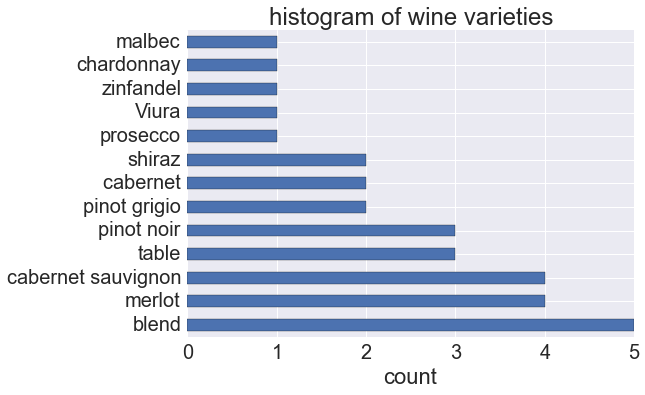

In [76]:
wine_mapping.variety.value_counts().plot(kind='barh', title='histogram of wine varieties')
plt.xlabel('count')

# Best and worst varieties of wine

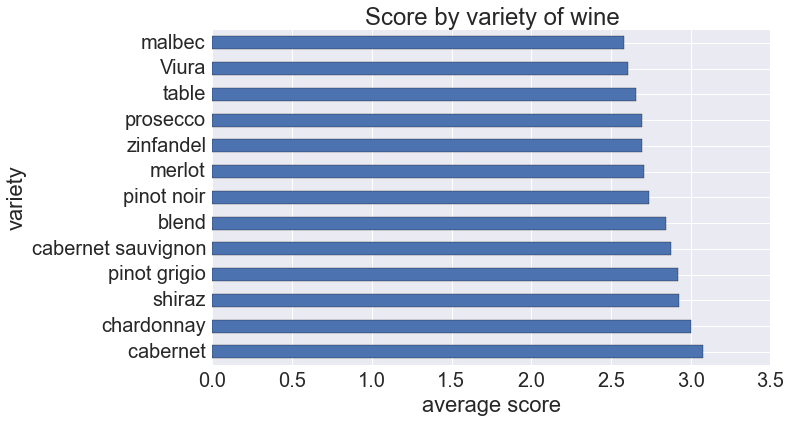

In [73]:
data.groupby('variety').score.mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Score by variety of wine')
plt.xlabel('average score')

# Best and worst wines

In [70]:
sorted_wines = data.groupby('wine_display_name').score.mean().sort_values(ascending=False)

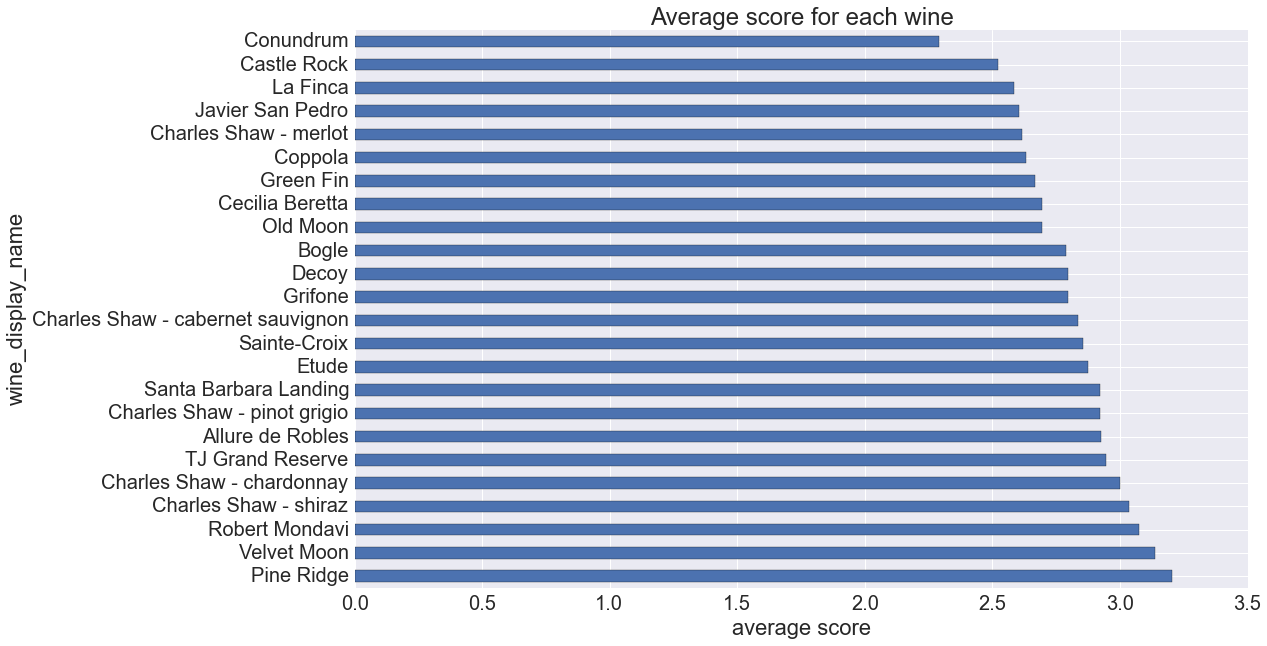

In [72]:
sorted_wines.plot(kind='barh', figsize=(16,10), title='Average score for each wine')
plt.xlabel('average score')

# Red vs. white

In [59]:
data['type'] = data['type'].str.strip()

In [64]:
red_vs_white = pd.DataFrame(data.groupby('type').score.mean().sort_values())
red_vs_white.columns = ['average score']
red_vs_white

,average score
type,
red,2.805085
white,2.806557


# Who liked the wines the most?

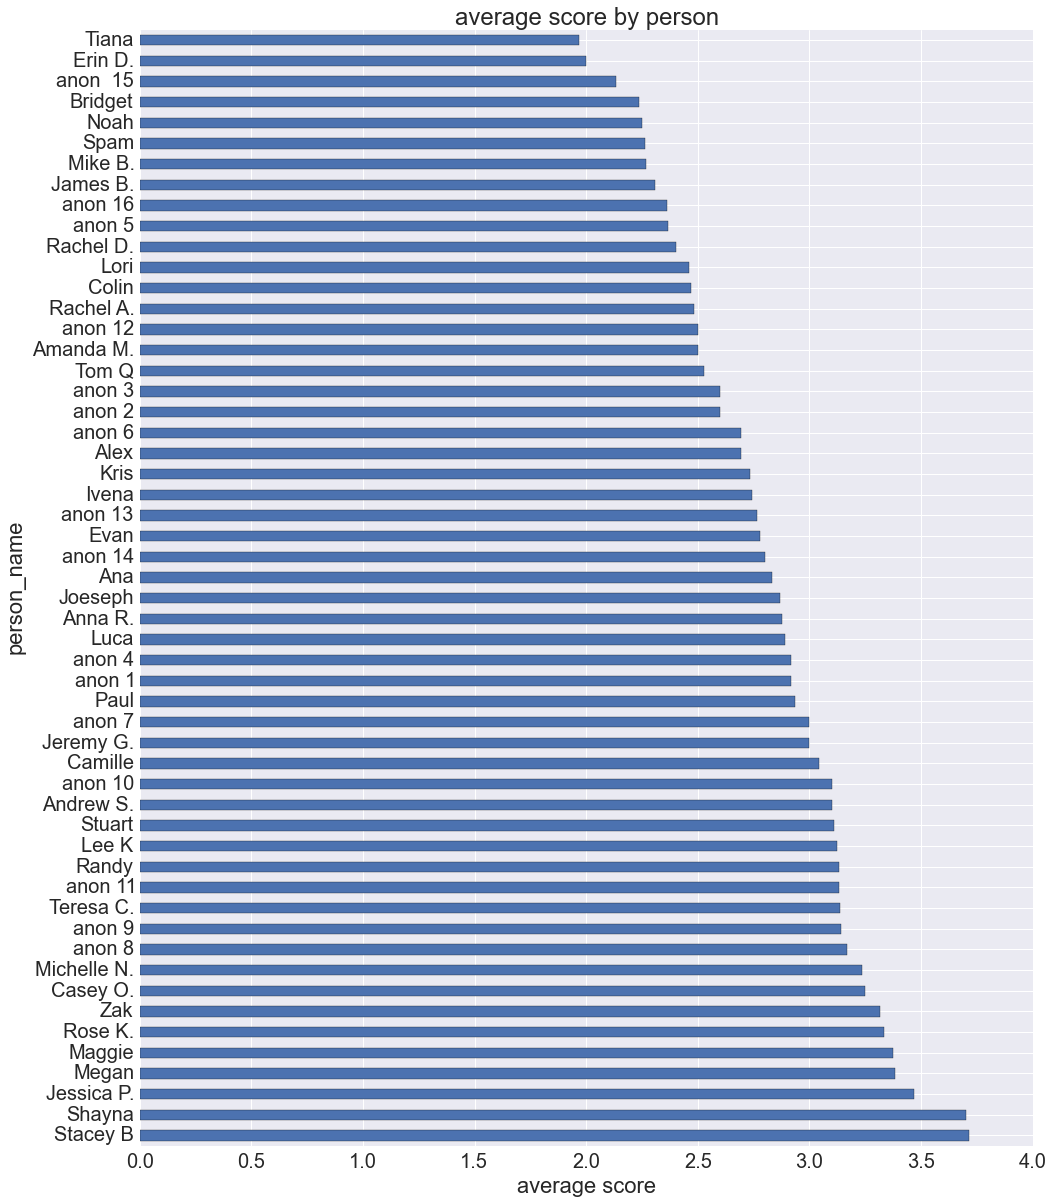

In [81]:
data.groupby('person_name').score.mean().sort_values(ascending=False).plot(kind='barh', figsize=(16, 20), title='average score by person')
plt.xlabel('average score')

# Relationship of price and score

(0, 6.0)

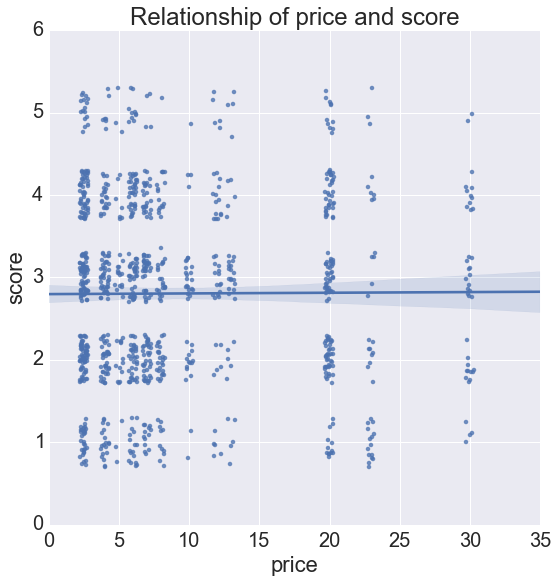

In [115]:
sns.lmplot(x="price", y="score", data=data, size=8, x_jitter=0.3, y_jitter=0.3)
plt.title('Relationship of price and score')
plt.ylim(ymin=0)

The shaded blue area is the 95% confidence interval for the linear regression fit. There's no significant correlation.

(0, 6.0)

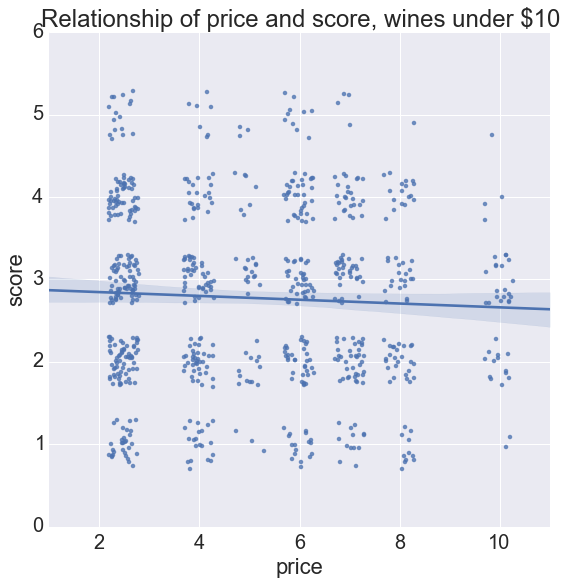

In [116]:
sns.lmplot(x="price", y="score", data=data[data.price < 10.0], size=8, x_jitter=0.3, y_jitter=0.3)
plt.title('Relationship of price and score, wines under $10')
plt.ylim(ymin=0)

Similarly, no significant correlation

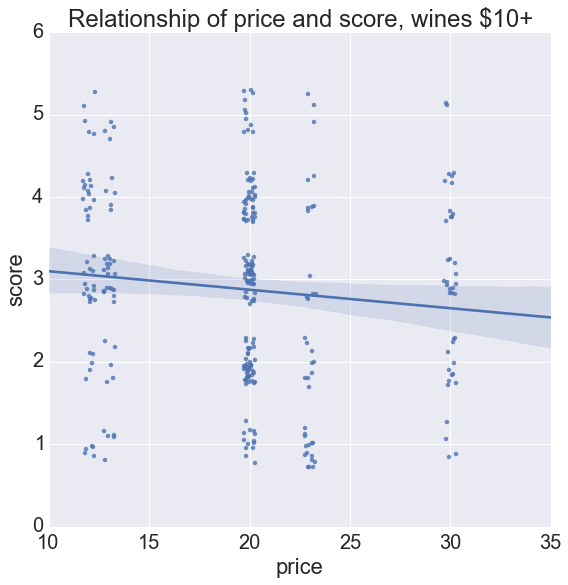

In [434]:
sns.lmplot(x="price", y="score", data=data[data.price >= 10], size=8, x_jitter=0.3, y_jitter=0.3)
plt.title('Relationship of price and score, wines $10+')

There's a significant negative correlation, as you go above $10, wines get worse on average (for this sample of wines).

# Relationship of price and price guess

(0, 60)

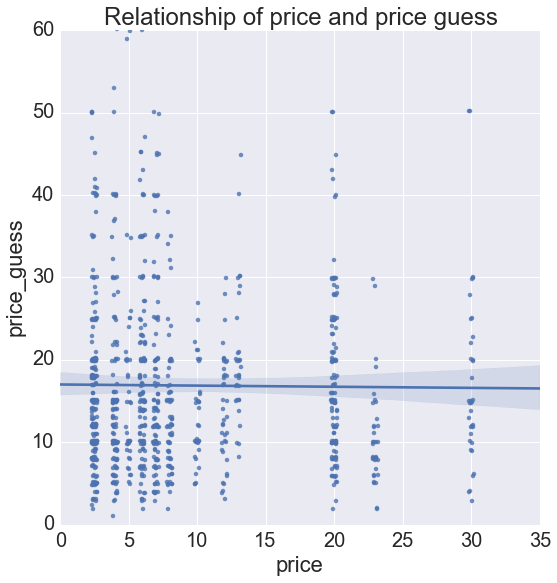

In [85]:
sns.lmplot(x="price", y="price_guess", data=data, size=8, x_jitter=0.2, y_jitter=0.2)
plt.title('Relationship of price and price guess')
plt.ylim(ymin=0, ymax=60)

No significant correlation

# Best price guessers

In [86]:
data['abs_price_error'] = (data['price'] - data['price_guess']).abs()

In [87]:
price_guesses = data.groupby('person_name').abs_price_error.agg(['mean', 'count']).sort_values('mean')
price_guesses.columns = ['Avg. Price Error', 'Number of Wines Priced']

In [89]:
price_guesses.dropna()

,Avg. Price Error,Number of Wines Priced
person_name,,
Anna R.,3.005000,8
Amanda M.,3.255000,4
Ana,5.802000,5
Tiana,6.051379,29
Lori,6.273077,13
Rachel D.,6.438000,30
anon 4,6.554667,30
Mike B.,6.802000,15
Erin D.,6.930000,7


# Score as the night wore on

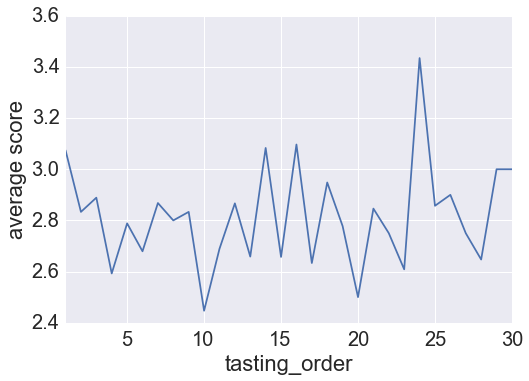

In [102]:
data.groupby('tasting_order').score.mean().plot()
plt.ylabel('average score')

There's no obvious trend in score as people tasted more wines, it looks random.

# Tasting dedication

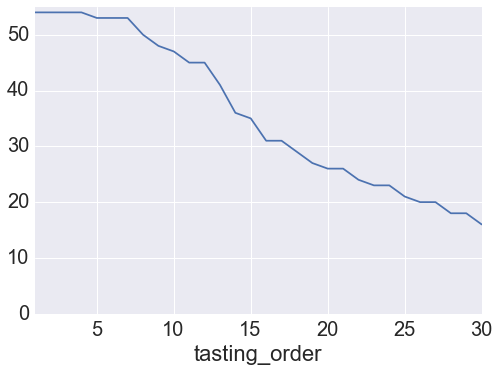

In [105]:
data.groupby('tasting_order').wine_number.count().plot(ylim=0)

An impressive number of people tasted all the wines!

# Trying the same wine twice

In [107]:
def get_avg_score_diff(df):
    if len(df) > 1:
        return df.score.diff().abs().mean()
same_wine_avg_diff = data.groupby(['person_name', 'wine_name', 'variety']).apply(get_avg_score_diff).dropna().mean()

In [108]:
same_person_avg_diff = data.groupby(['person_name']).apply(get_avg_score_diff).dropna().mean()

In [117]:
same_wine_diffs = pd.Series([same_wine_avg_diff, same_person_avg_diff], index=['same person same wine', 'same person different wine'])

In [118]:
same_wine_diffs = pd.DataFrame(same_wine_diffs, columns=['average score difference'])
same_wine_diffs

,average score difference
same person same wine,1.037791
same person different wine,1.155291


On average, when a single person tasted the same wine twice and didn't know it, they gave it a score that differed by 1.04 points. This is only slightly smaller than the average difference of a person scoring two different wines, which was 1.16 points. This indicates that most of the variation in scores is due to factors other than the wine: randomness, what wine you tasted before, etc...

In [114]:
data.to_csv('full_wine_tasting_results.csv', index=False)